## 1. Construcción Inicial del Modelo
El desarrollo comenzó con un modelo CNN utilizando la API funcional de Keras. Inicialmente, el modelo tenía dos bloques de capas convolucionales:

* Bloques de Convolución: Cada bloque consistía en capas Conv2D con 32 o 64 filtros, seguidas de BatchNormalization, y una capa de MaxPooling2D para reducir la dimensionalidad. Se aplicaba SpatialDropout2D para mejorar la generalización.
* Pooling Global y Salida: El modelo finalizaba con un GlobalAveragePooling2D, seguido de una capa densa con una función de activación softmax para la clasificación.
* Optimización y Compilación: Se utilizó el optimizador Adam con categorical_crossentropy como la función de pérdida y accuracy como métrica de evaluación.
  
## 2. Mejora Progresiva del Modelo
Se fué realizando varias modificaciones al modelo con el objetivo de mejorar su rendimiento y evitar el sobreajuste, siempre toamando como guía la evolución de las métricas de entrenamiento y validación:

**Batch Size y Datos:**

El batch size fue ajustado. Por problemas de memoria del pc con el que se comenzó el desarrollo  se probaron valores  bajos como 4 y 6, luego se aumentó a 32 y 64, y se observó que tamaños de lote más grandes ayudaban a la estabilidad, pero, si el valor era demasiado alto, generaba problemas de overfitting.

**Ajuste del Learning Rate:**

Inicialmente, el learning rate fue establecido en valores que en principio parecian bajos, empezando con 0.001 y ajustándose progresivamente hasta alcanzar 0.0001. A medida que incrementabas el learning rate, observaste mejoras en la velocidad de convergencia del modelo y disminución en la pérdida.
Sin embargo, valores muy altos generaban inestabilidad en la validación, mostrando que había un punto de equilibrio que debía respetarse.

<div style="text-align: center">
<figcaption>LearninRate 0,001</figcaption>
</div>

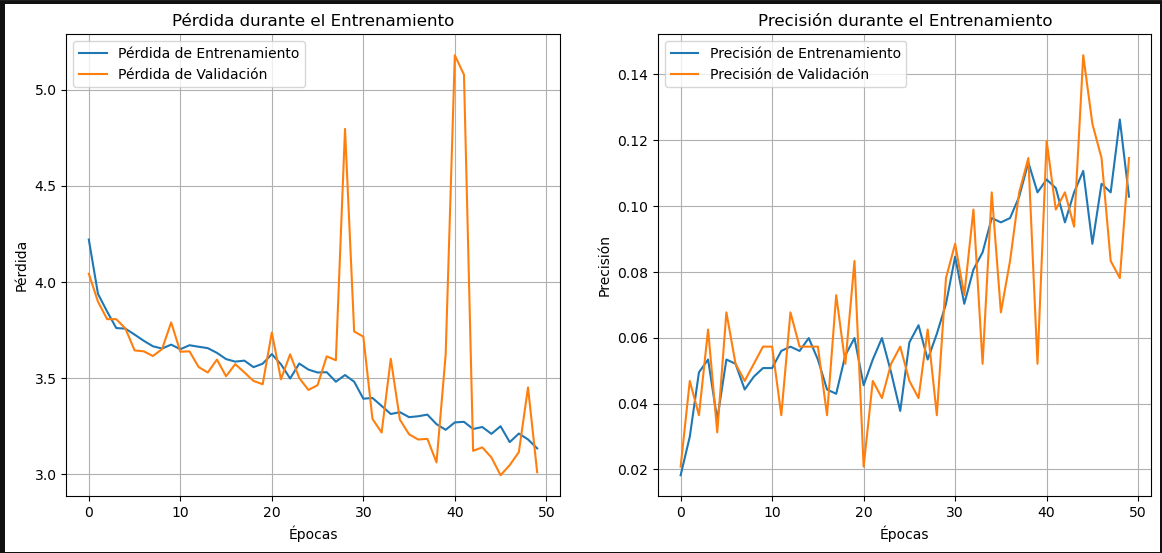


<div style="text-align: center">
<figcaption>LearninRate 0,0001</figcaption>
</div>    

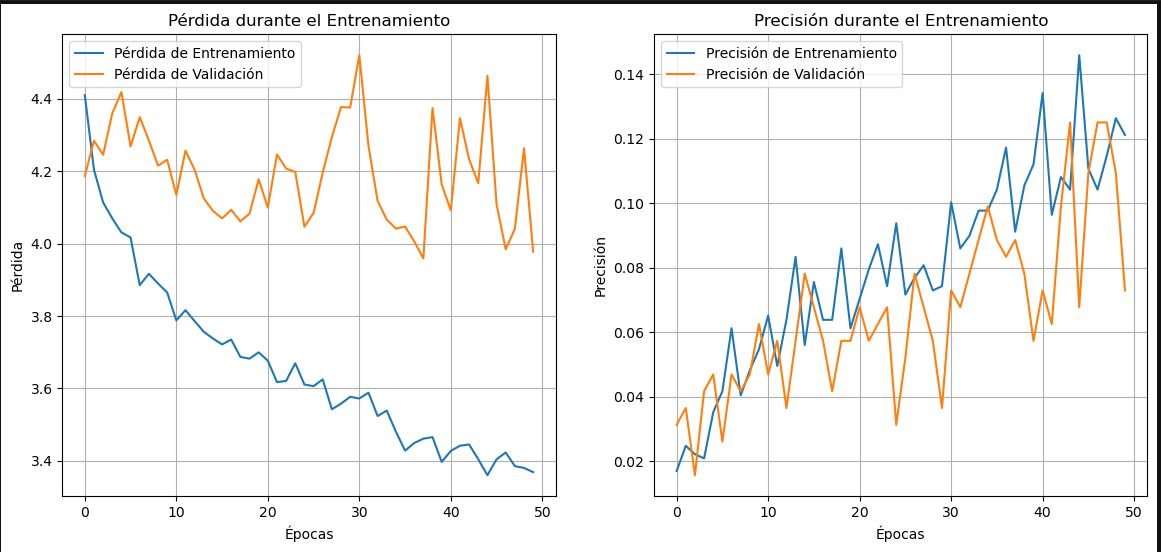


**Aumento de Épocas y Filtros:**

* Épocas: Inicialmente se usó una cantidad moderada de épocas, incrementándola posteriormente a 100 para observar si el modelo continuaba mejorando, se notó que más épocas ayudaban a reducir la pérdida, pero también incrementaban el riesgo de sobreajuste, especialmente si no se ajustaban bien otros parámetros.

<div style="text-align: center">
<figcaption>50 epocs</figcaption>
</div>

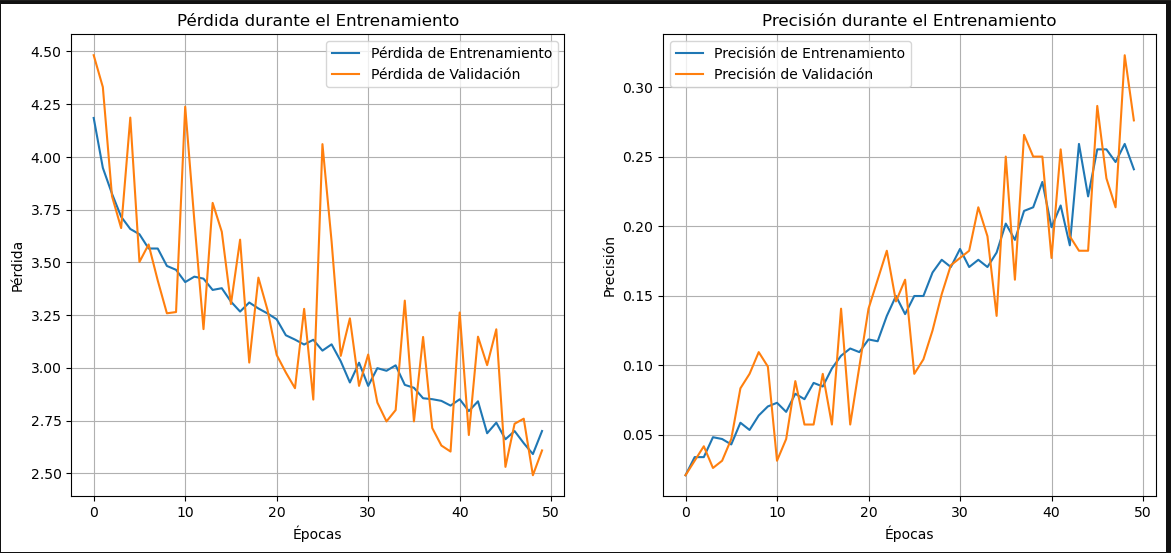

<div style="text-align: center">
<figcaption>100 epocs</figcaption>
</div>

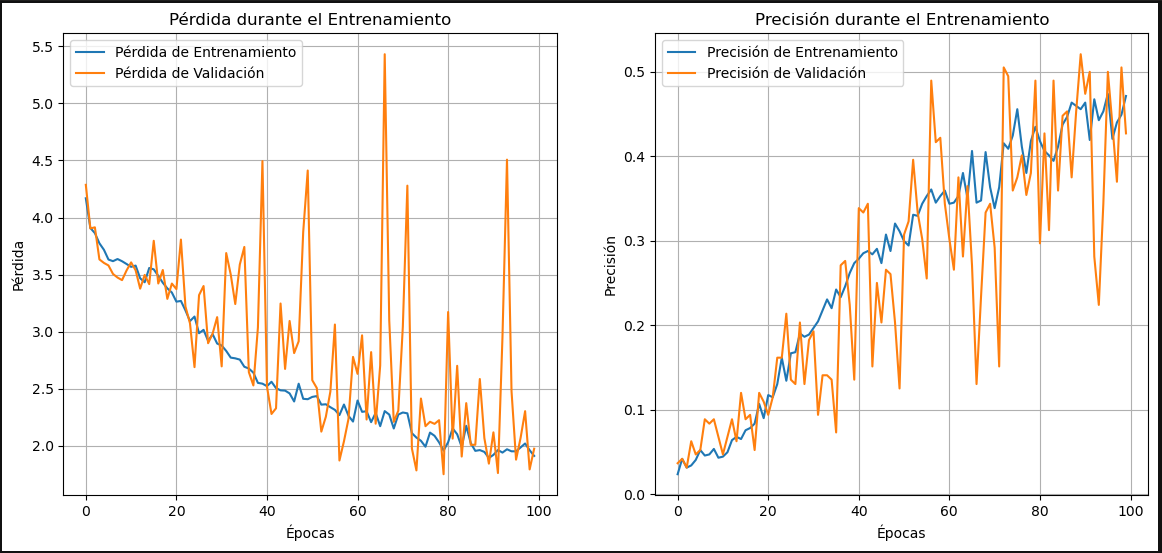

Número de Filtros: Los bloques convolucionales fueron modificados aumentando la cantidad de filtros en cada capa. Llegaste a probar configuraciones con tres bloques de 32, 64, y 128 filtros respectivamente, hasta llegar a modelos más profundos con cinco bloques que tenían 32, 64, 128, 256 y 512 filtros. Las mejoras fueron significativas hasta llegar al modelo actual.

<div style="text-align: center">
<figcaption>Filtros 32,64,128</figcaption>
</div>

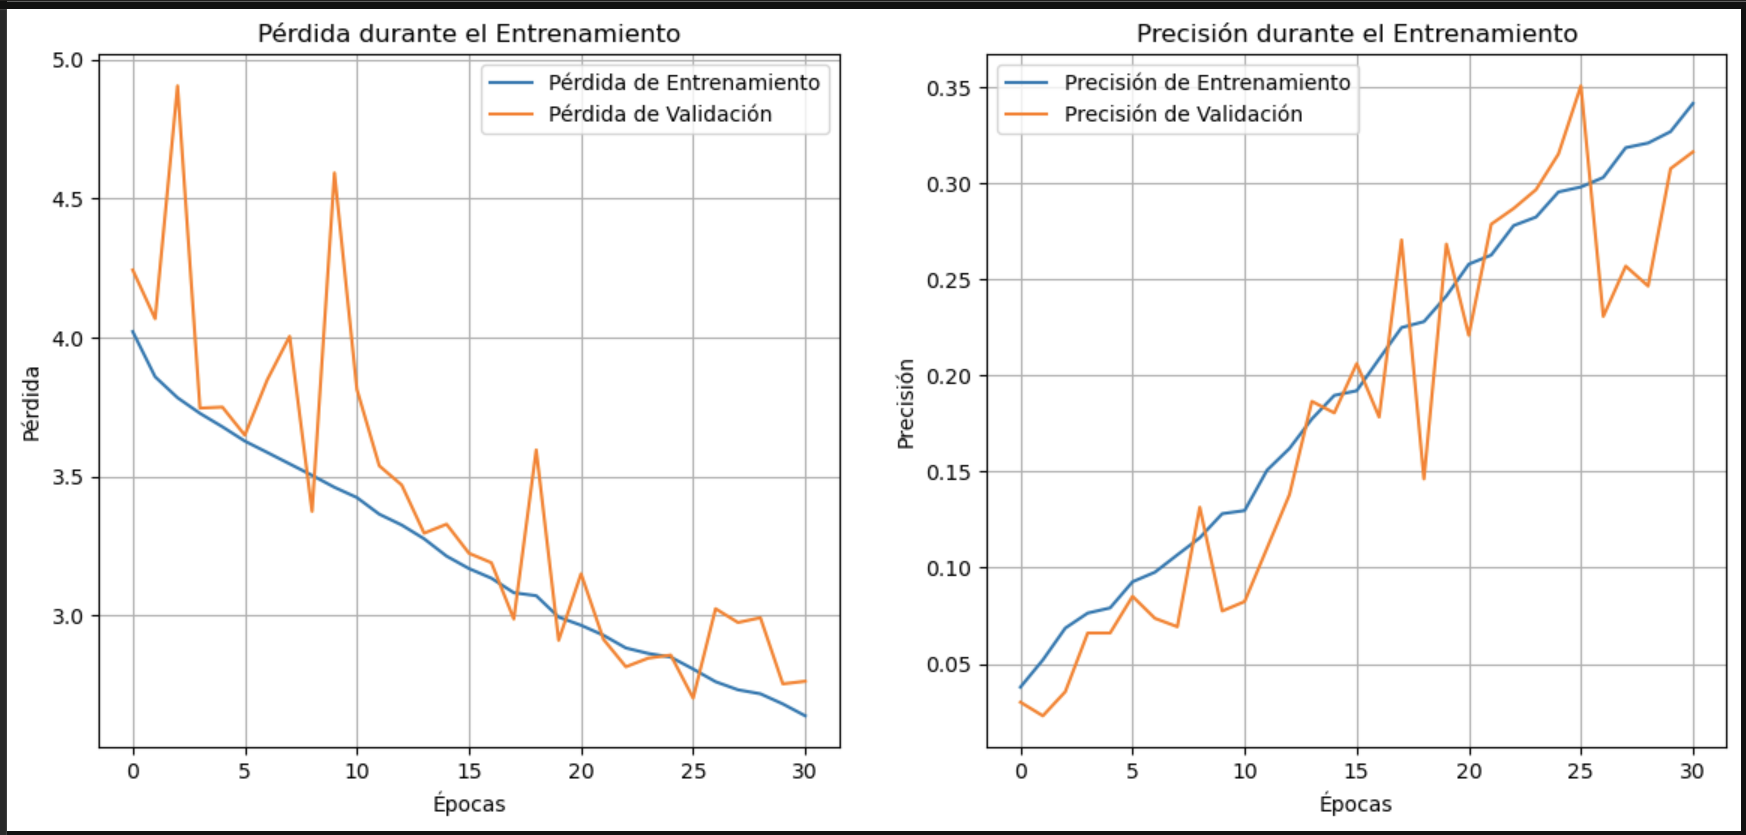

<div style="text-align: center">
<figcaption>Filtros 32,64,128,256,512</figcaption>
</div>

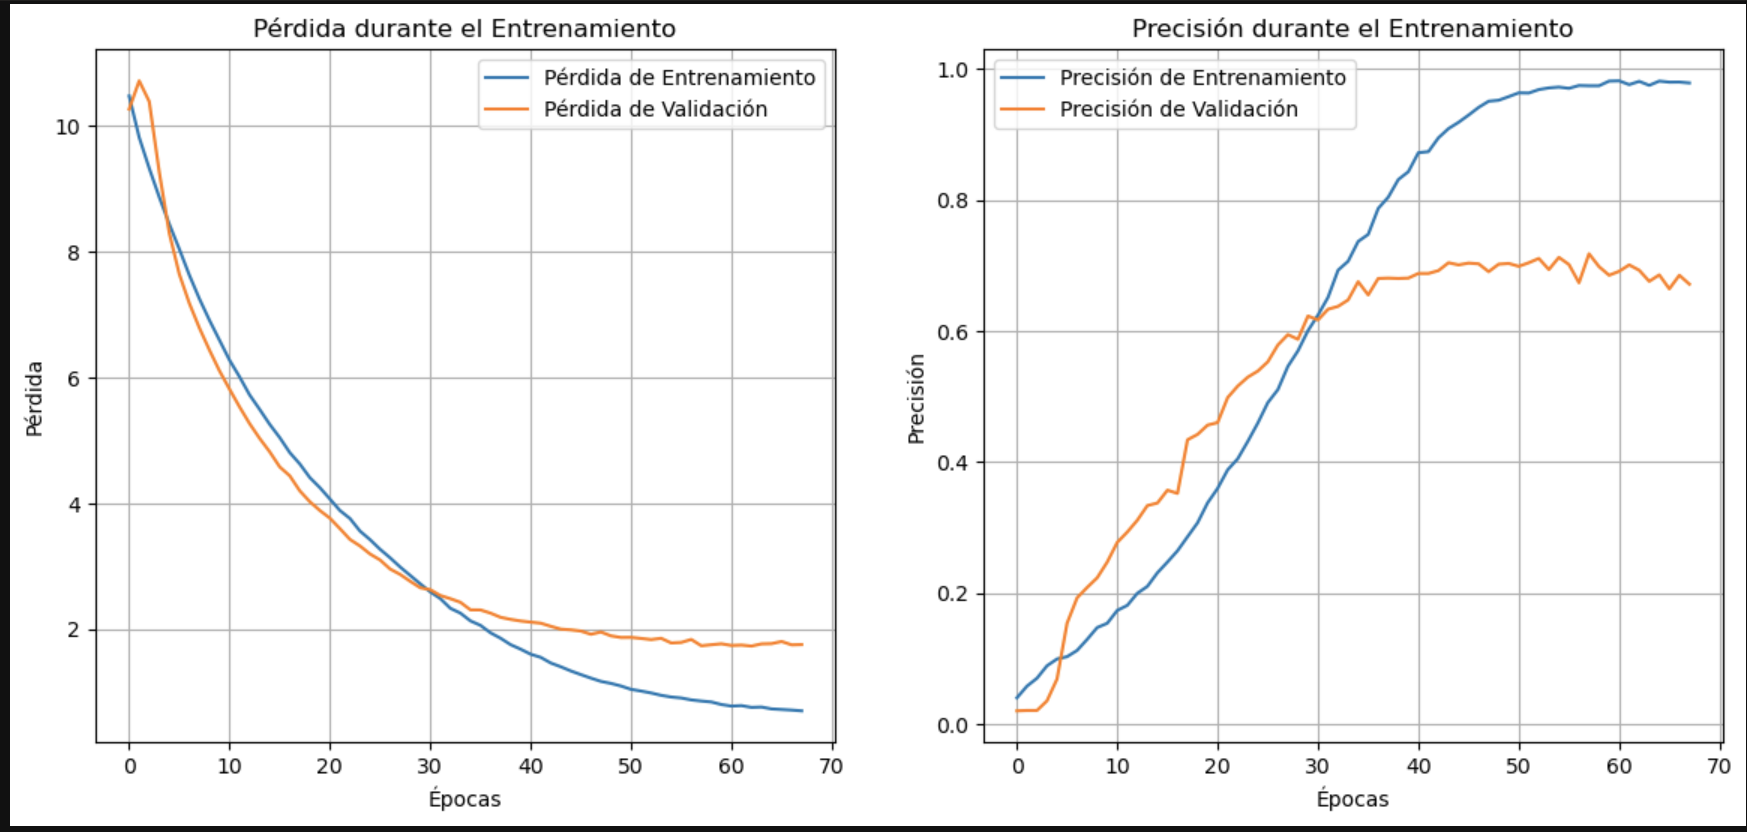

**Regularización y Dropout:**

Se añade luego la regularización l2 con diferentes valores para reducir el sobreajuste.
Aumentaste el valor del dropout a 0.1 y luego a 0.2. El Dropout se mostró eficaz para reducir la inestabilidad en el entrenamiento, aunque en ocasiones podía causar overfitting en la validación.

** Callbacks usados**

Además de los ajustes a la arquitectura y los hiperparámetros, se implementó varios callbacks para mejorar el proceso de entrenamiento:
* Early Stopping: se usó para detener el entrenamiento si el modelo no mejoraba después de un número determinado de épocas (patience). Esto permitió evitar el sobreentrenamiento y restaurar los mejores pesos observados durante el entrenamiento.
* Reduce Learning Rate on Plateau: se usó para disminuir el learning rate si el rendimiento en la métrica de monitoreo dejaba de mejorar, lo cual ayudó a que el modelo convergiera mejor en etapas avanzadas del entrenamiento.
* Model Checkpoint: se usó para guardar el mejor modelo durante el entrenamiento, permitiendo restaurar el estado óptimo del modelo.


Después de unificar todos los datos, se abandonan los prototipos y se crea el modelo presente en la actividad el cual generó el siguiente resultado: 

<div style="text-align: center">
<figcaption>Modelo final</figcaption>
</div>

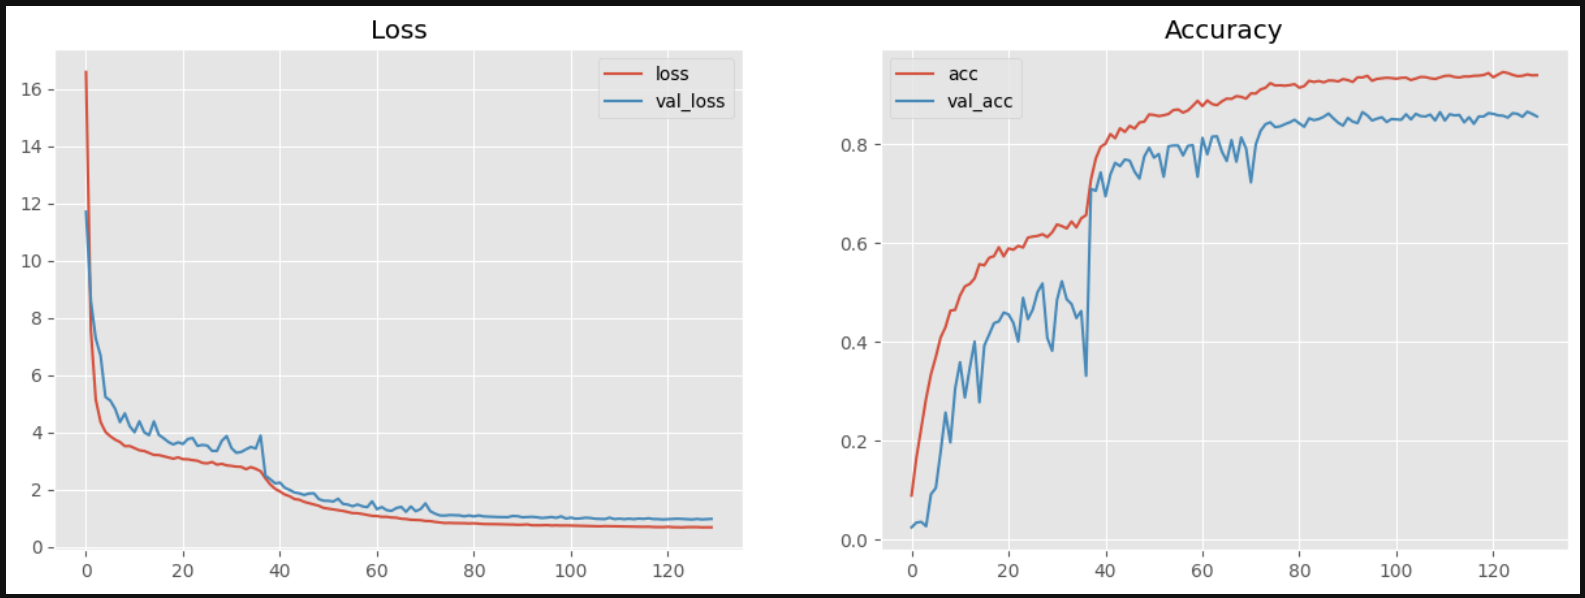


